### New York City Taxi Trip Duration

프로젝트 목표 : 뉴욕시에서 택시를 탔을때 총 주행시간를 예측하는 모형 만들기

In [1]:
import pandas as pd
import datetime

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
taxi = pd.read_csv("train.csv")

FileNotFoundError: File b'train.csv' does not exist

In [4]:
taxi.tail()

NameError: name 'taxi' is not defined

In [7]:
# 총 변수는 11개, 데이터는 1,458,644개
taxi.shape

(1458644, 11)

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


#### 변수 (Kaggle)

- id - a unique identifier for each trip 
- vendor_id - a code indicating the provider associated with the trip record 
- pickup_datetime - date and time when the meter was engaged 
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

#### 변수분석 (11개)

- id : 고유번호
- vendor_id : 주행기록과 관련된 업체를 나타냄 (1,2로만 구성)
- pickup_datetime : 탑승시간 (년, 월, 일, 시간, 분, 초로 구성)
- dropoff_datetime : 하차시간 (년, 월, 일, 시간, 분, 초로 구성)
- passenger_count : 한 택시안의 승객수(명)
- pickup_longitude : 탑승 경도 (좌표)
- pickup_latitude : 탑승 위도 (좌표)
- dropoff_longitude : 하차 경도 (좌표)
- dropoff_latitude : 하차 위도 (좌표)
- store_and_fwd_flag : 주행기록이 차량 메모리에 보관되어 있는지 여부 (yes, no)
- trip_duration : 주행시간 (초)

### Taxi Data Summary

In [24]:
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1456540.00,1456540.00,1456540.00,1456540.00,1456540.00,1456540.00,1456540.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,836.86
std,0.50,1.31,0.07,0.03,0.07,0.04,658.93
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1073.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,11411.00


{'boxes': [<matplotlib.lines.Line2D at 0x11506a198>],
 'caps': [<matplotlib.lines.Line2D at 0x11506aba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x115072860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115072438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11506a2e8>,
  <matplotlib.lines.Line2D at 0x11506a780>]}

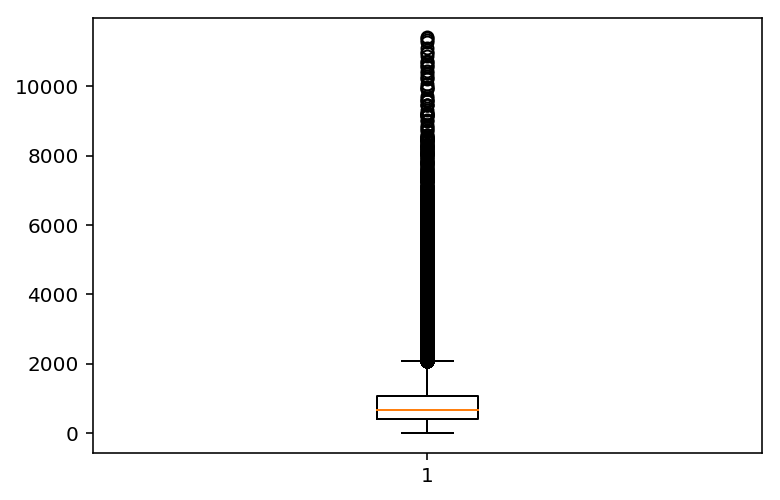

In [68]:
plt.boxplot(taxi["trip_duration"])

{'boxes': [<matplotlib.lines.Line2D at 0x10f899ba8>],
 'caps': [<matplotlib.lines.Line2D at 0x10f897550>,
 'fliers': [<matplotlib.lines.Line2D at 0x10f895160>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10f897eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10f899cf8>,
  <matplotlib.lines.Line2D at 0x10f897048>]}

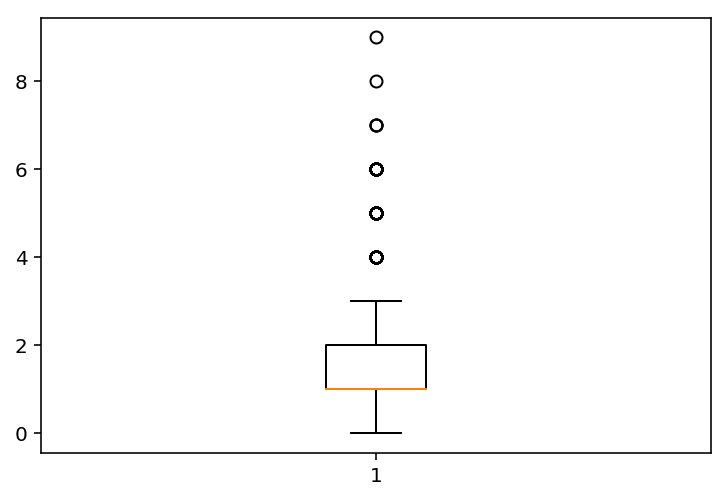

In [69]:
plt.boxplot(taxi["passenger_count"])

In [ ]:
taxi_drt = taxi['trip_duration']
taxi_drt

In [ ]:
m = np.mean(taxi['trip_duration'])
s = np.std(taxi['trip_duration'])
taxi = taxi[taxi['trip_duration'] <= m + 2*s]
taxi = taxi[taxi['trip_duration'] >= m - 2*s]

### Datetime analysis 

- 날짜 같은 경우엔 주말/평일, 혹은 월별, 계절별에 대한 분포를 파악할 수 있을것
- 시간대는 크게 아침/점심/저녁이나 출근시간/퇴근시간 등으로 나눠서 파악해 보는것도 좋을것

In [60]:
taxi["pickup_datetime"] = pd.to_datetime(taxi["pickup_datetime"]) # pickup_datetime데이터를 datetime타입으로 변환
taxi["pickup_month"] = taxi["pickup_datetime"].dt.month
taxi["pickup_day"] = taxi["pickup_datetime"].dt.day
taxi["pickup_hour"] = taxi["pickup_datetime"].dt.hour
taxi["pickup_weekday"] = taxi["pickup_datetime"].dt.weekday

In [61]:
taxi_pickup_month = pd.DataFrame(taxi, columns=["pickup_month"])
taxi_pickup_month = taxi.groupby(["pickup_month"]).size().reset_index(name='Counts')
taxi_pickup_month

,pickup_month,Counts
0,1,229379
1,2,237982
2,3,255806
3,4,251285
4,5,248127
5,6,233961


In [62]:
taxi_pickup_hour = pd.DataFrame(taxi, columns=["pickup_hour"])
taxi_pickup_hour = taxi.groupby(["pickup_hour"]).size().reset_index(name='Counts')
taxi_pickup_hour

,pickup_hour,Counts
0,0,53171
1,1,38496
2,2,27909
3,3,20847
4,4,15756
5,5,14980
6,6,33220
7,7,55548
8,8,66979
9,9,67587


In [63]:
taxi_pickup_weekday = pd.DataFrame(taxi, columns=["pickup_weekday"])
taxi_pickup_weekday = taxi.groupby(["pickup_weekday"]).size().reset_index(name='Counts')
taxi_pickup_weekday

,pickup_weekday,Counts
0,0,187208
1,1,202472
2,2,209886
3,3,218276
4,4,223192
5,5,220474
6,6,195032


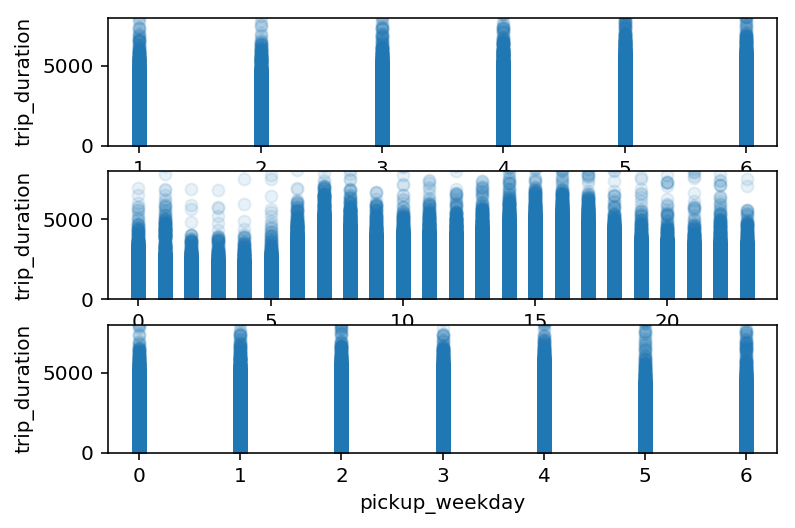

In [71]:
fig, ax = plt.subplots(3, 1) 

ax[0].scatter(taxi['pickup_month'], taxi['trip_duration'], alpha=0.1)
ax[0].set_xlabel('pickup_month')
ax[0].set_ylabel('trip_duration')
ax[0].set_ylim([0, 8000])

ax[1].scatter(taxi['pickup_hour'], taxi['trip_duration'], alpha=0.1)
ax[1].set_xlabel('pickup_hour')
ax[1].set_ylabel('trip_duration')
ax[1].set_ylim([0, 8000])

ax[2].scatter(taxi['pickup_weekday'], taxi['trip_duration'], alpha=0.1)
ax[2].set_xlabel('pickup_weekday')
ax[2].set_ylabel('trip_duration')
ax[2].set_ylim([0, 8000])

plt.show()

#### 탑승 위치 대략적으로 파악해보기

In [6]:
from ipyleaflet import *
import time

In [7]:
center = [40.7830603, -73.9712488] # [위도, 경도]
zoom = 15
m = Map(center = center, zoom = zoom)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[40.7830603, -73.9712488], default_tiles=TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']), layers=(TileLayer(max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'opacity', 'tile_size']),), layout=Layout(align_self='stretch', height='400px'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=15)

In [8]:
marker = Marker(location=center)
m += marker

In [9]:
taxi['pickup'] = list(zip(taxi['pickup_latitude'], taxi['pickup_longitude']))
pickup_sample = list(taxi['pickup'][0:100]) # sample data 생성

In [10]:
locs = pickup_sample
for loc in locs:
    marker = Marker(location=loc)
    m += marker
    time.sleep(0.5)

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

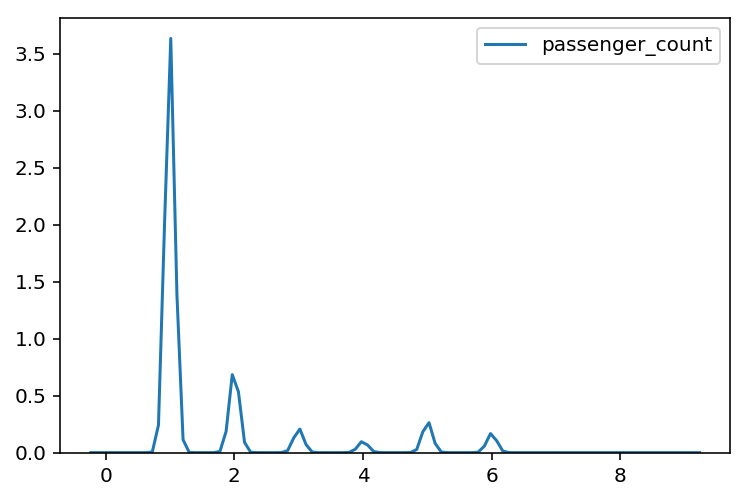

In [128]:
sns.kdeplot(taxi["passenger_count"]) # 승객 탑승인원 분포도, 대부분 혼자 이용하는것을 파악할 수 있음

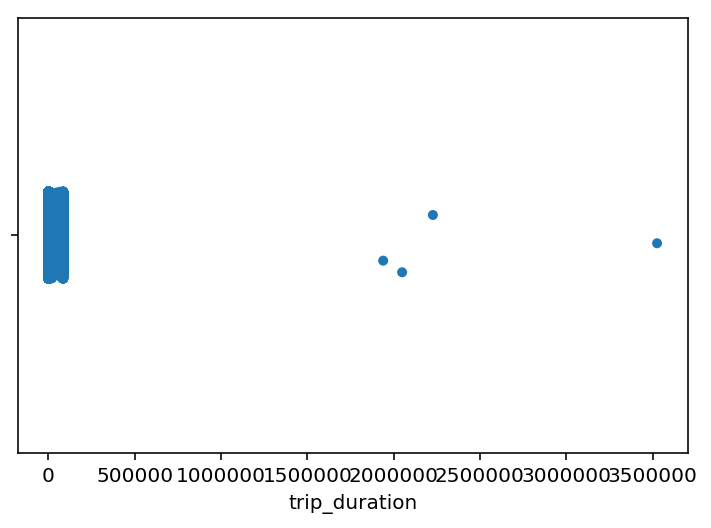

In [126]:
np.random.seed(0)
sns.stripplot(x="trip_duration", data=taxi, jitter=True)
plt.show() # 이상치 4개 발견, 제거하는게 좋을 것으로 판단

In [148]:
outlier = list(taxi["trip_duration"])
outlier.sort()
outlier.reverse()
outlier[0:4] # 이상치 값 발견

[3526282, 2227612, 2049578, 1939736]

In [155]:
len(taxi['trip_duration'][taxi['trip_duration'] < 10]) 
# 이런 데이터들은 미터기를 모르고 켰다가 끈 경우들을 포함하고 있다고 판단됨

1984

#### 그냥 이것저것 일단 만져보자

#### 1. vendor 유형에 따른 데이터 갯수

In [182]:
taxi_vendor = pd.DataFrame(taxi, columns=["vendor_id"])
taxi_vendor = taxi.groupby(["vendor_id"]).size().reset_index(name='Counts')
taxi_vendor

,vendor_id,Counts
0,1,678342
1,2,780302


#### 2. store_and_fwd_flag 유형에 따른 데이터 갯수

In [185]:
taxi_store = pd.DataFrame(taxi, columns=["store_and_fwd_flag"])
taxi_store = taxi.groupby(["store_and_fwd_flag"]).size().reset_index(name='Counts')
taxi_store

,store_and_fwd_flag,Counts
0,N,1450599
1,Y,8045


- store_and_fwd_flag를 안한 횟수가 훨씬 많은데 이건 상관 없는 변수인가?

#### 3. passenger_count 유형에 따른 데이터 갯수

In [184]:
taxi_passenger = pd.DataFrame(taxi, columns=["passenger_count"])
taxi_passenger = taxi.groupby(["passenger_count"]).size().reset_index(name='Counts')
taxi_passenger 

,passenger_count,Counts
0,0,60
1,1,1033540
2,2,210318
3,3,59896
4,4,28404
5,5,78088
6,6,48333
7,7,3
8,8,1
9,9,1


- 승객이 0명인것은 무엇을 의미하는지 파악해야 (오작동으로 봐야할지 다른 의미가 있는건지)
- 택시가 몇인용까지 있는지를 확인해야 (7~9명은 이상치로 판단)